0. Install and Import Dependencies

In [2]:
!pip install easyocr
!pip install imutils

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

1. Read an Image, Grayscale and Blur

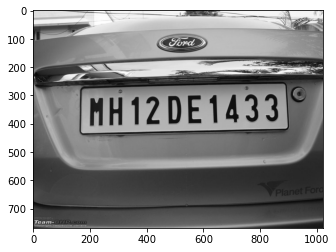

In [2]:
img = cv2.imread('car1.jpeg')
#converted into gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

2. Apply filter and find edges for localization 

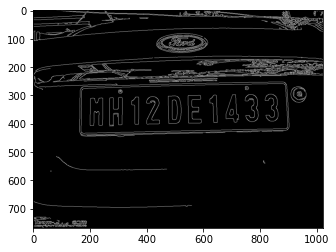

In [3]:
#bilateral filter is used to blur the edges
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Canny Edge Detector
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

3. Find Contours and Apply Mask

In [4]:
#finding all contours in the image
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
#selecting particular contours
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [5]:
location = None

for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx == 4):
        location = approx
        break

In [6]:
location

array([[[896, 267]],

       [[884, 253]],

       [[180, 269]],

       [[166, 282]],

       [[164, 428]],

       [[186, 440]],

       [[892, 424]],

       [[904, 412]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
#draw the contour
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)

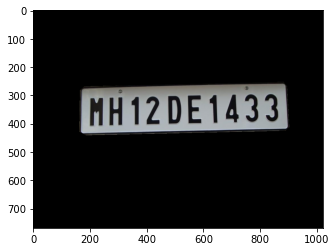

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1] # getting rectangular object

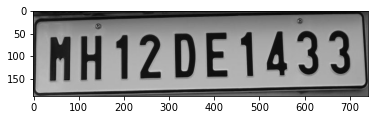

In [10]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

4. Use Easy OCR To Read Text

In [11]:
reader = easyocr.Reader(['en'], gpu = False)
result = reader.readtext(cropped_image)
result

Using CPU. Note: This module is much faster with a GPU.


[([[20, 22], [720, 22], [720, 173], [20, 173]],
  'HHI2 DE1433',
  0.6704915814172392)]

5. Render Result

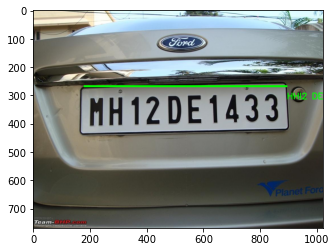

In [12]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0,255,0), thickness = 2, lineType = cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))